In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import sklearn as sk

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df['Sex'] = df['Sex'].map({'M': 2, 'F': 1, 'I':0})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
sex = pd.unique(df.Sex.values)
aba_df = {sex:df['Length'][df.Sex == sex] for sex in sex}

In [7]:
aba_df=pd.DataFrame({"Male":aba_df[2].tolist()[0:1307],"Female":aba_df[1].tolist()})
aba_df

,Male,Female
0,0.455,0.530
1,0.350,0.530
2,0.440,0.545
3,0.475,0.550
4,0.430,0.525
...,...,...
1302,0.535,0.585
1303,0.570,0.585
1304,0.575,0.515
1305,0.580,0.565


In [8]:
df.shape

(4177, 9)

In [9]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

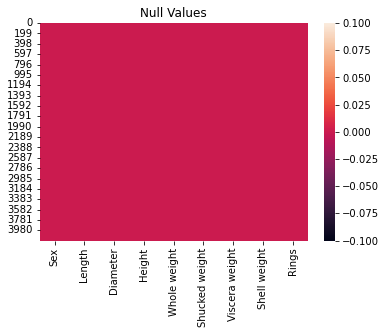

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [13]:
df.Sex.value_counts()

2    1528
0    1342
1    1307
Name: Sex, dtype: int64

In [14]:
df.skew()

Sex              -0.083056
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [15]:
df.corr()['Rings'].sort_values()

Sex               0.351822
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

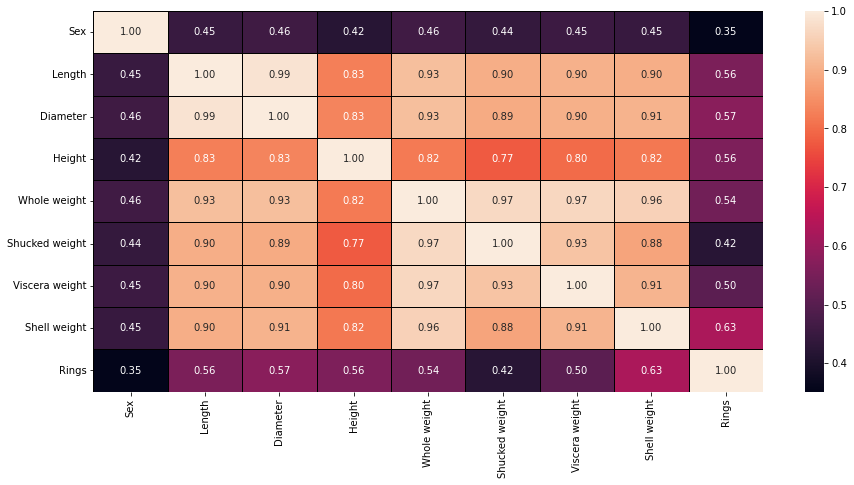

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')
plt.show()

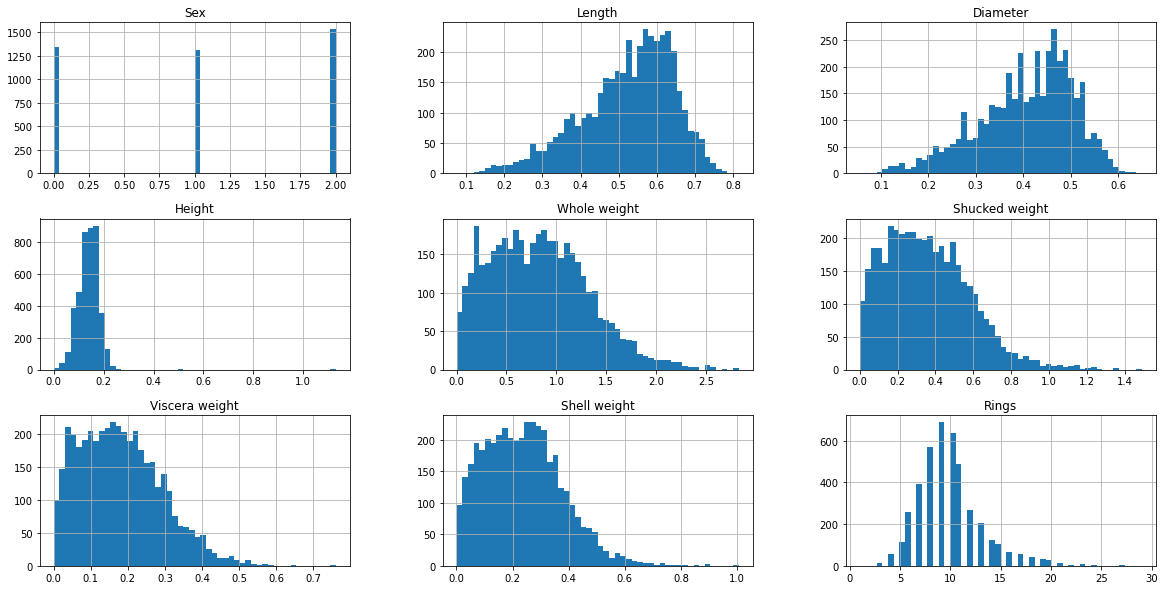

In [17]:
#creating a histogram for the dataset 
df.hist(bins=50, figsize=(20,10))
plt.show()

In [18]:
aba_male=df[df['Sex']==2]
aba_female=df[df['Sex']==1]

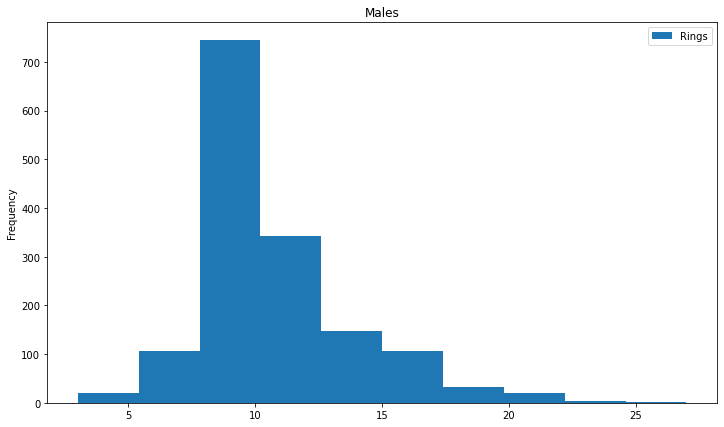

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,7)
aba_male["Rings"].plot(kind='hist', legend=True)
plt.title("Males")
plt.show()

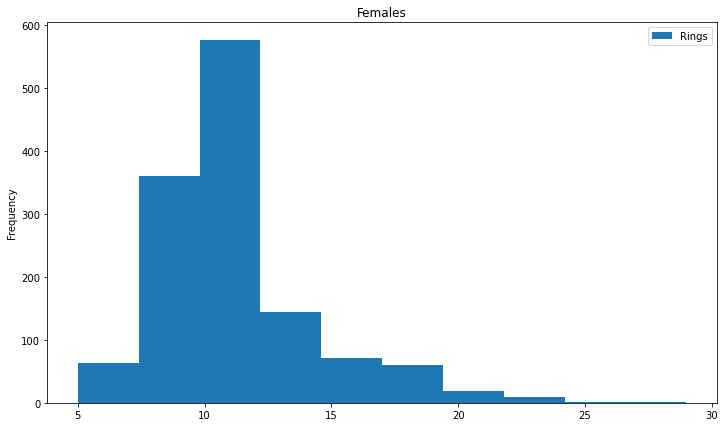

In [20]:
aba_female["Rings"].plot(kind='hist', legend=True)
plt.title("Females")
plt.show()

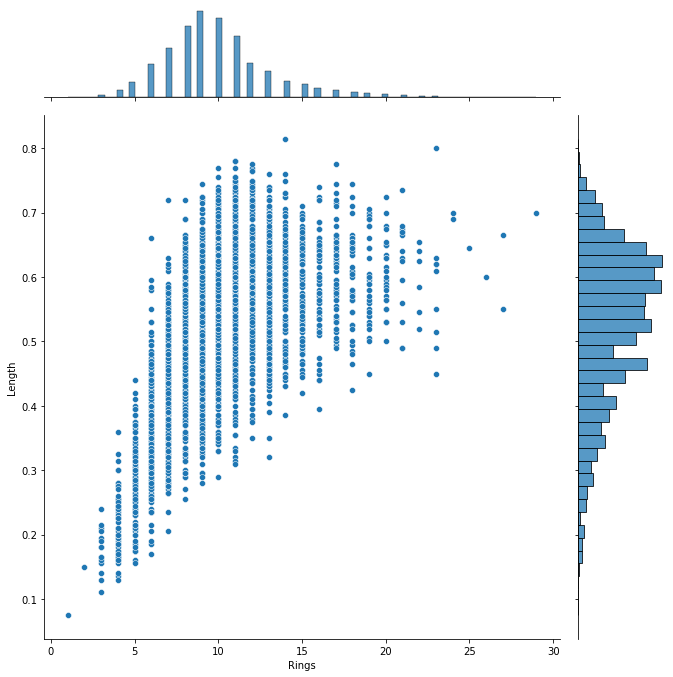

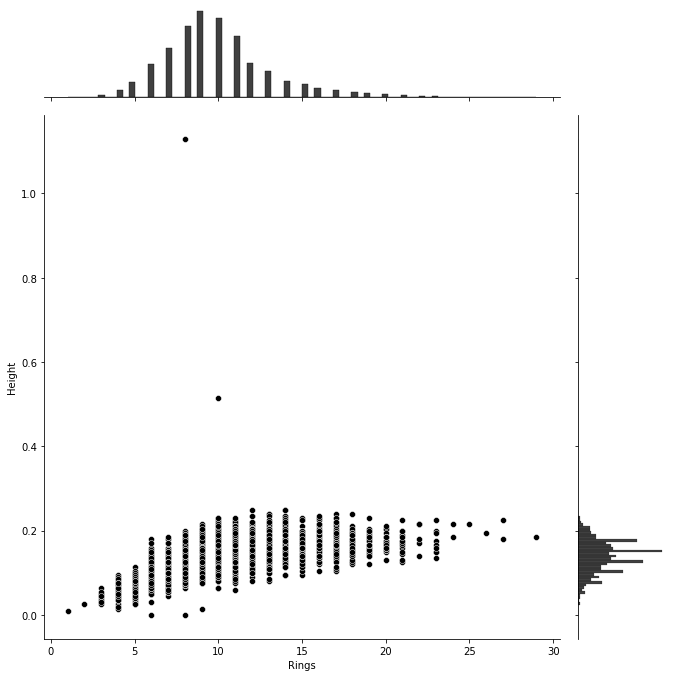

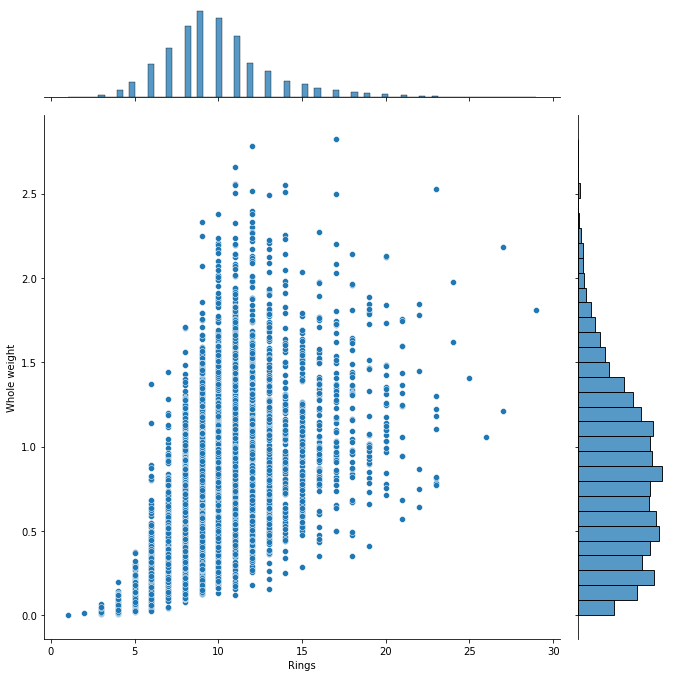

In [21]:
aba_sns = sns.jointplot(data=df, x='Rings', y='Length',kind='scatter')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=df, x='Rings', y='Height', kind='scatter',color='k')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=df, x='Rings', y='Whole weight', kind='scatter')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)

In [22]:
#calculate the median rings of infant
aba_rings = {sex:df['Rings'][df.Sex == sex] for sex in sex}
aba_rings[0].median()

8.0

In [26]:
# use Multiple Linear Regression 
aba_y = pd.DataFrame(df.Rings)
aba_x =pd.DataFrame(df[df.columns[0:6]])

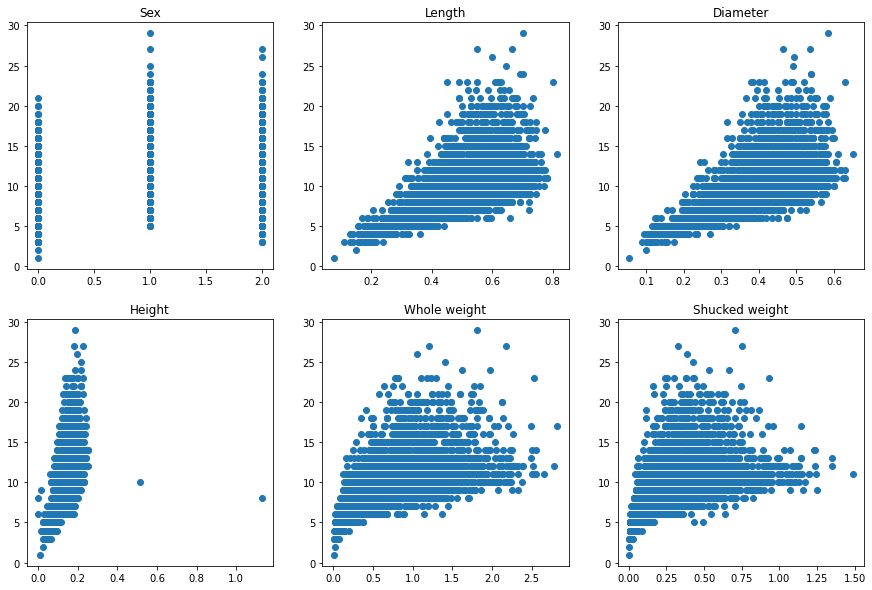

In [27]:
# showing the separate relationship figures of each element with Rings
fig = plt.figure(figsize=(15,10))
i=1
for col in aba_x.columns:
    ax = fig.add_subplot(2,3,i)
    i=i+1
    plt.scatter(aba_x[col], aba_y.Rings)
    ax.set_title(aba_x[col].name)

Text(0, 0.5, 'Predictions')

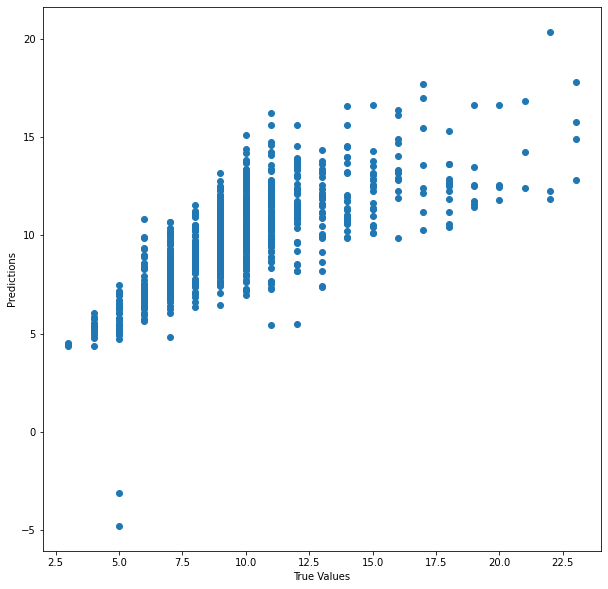

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=4)

# training the model
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, 
                                                   test_size=0.2, 
                                                   random_state=42)
fit = model.fit(abax_train, abay_train) 


preds = model.predict(abax_test)
## plot predicted vs dependent
plt.figure(figsize=(10,10))
plt.scatter(abay_test, preds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")


In [29]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(abay_test, preds)
MAE

1.6453265832218535

In [30]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(abay_test, preds)
RMSE = np.sqrt(MSE) 
RMSE

2.286576557971258

In [31]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(abay_test, preds)

0.5170133112004306

In [32]:
#creating a linear regression
r_sq = df[["Length", "Rings"]].corr() 
#Calculating Slope 
import numpy as np
B1 = r_sq.values[0][1] * (np.std(df.Rings)/np.std(df["Length"]))
print("For 1 unit of change in Length, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Length, we can predict 14.946410917580248 units of change in Rings


In [46]:
B0 = aba_infant.Rings.mean() - (B1 * aba_infant["Length"].mean())
B0

1.120418216725457

Text(0.5, 0, 'Independent Variable')

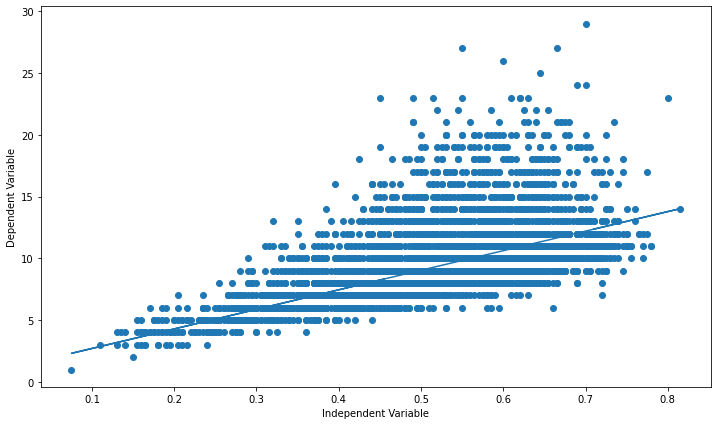

In [47]:
#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
df["Rings_line"] = B0 + (B1 * df["Length"])
plt.scatter(df["Length"],df.Rings) # create the main scatter plot
plt.plot(df["Length"], df.Rings_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [48]:
#Split into Training and Test Sets
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(df.Rings)
aba_x =pd.DataFrame(df["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept of the linear model
lr.intercept_

array([2.15563254])

Text(0, 0.5, 'Predictions')

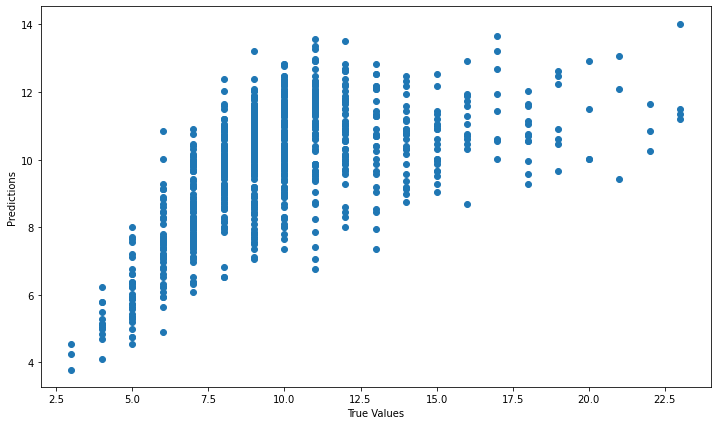

In [50]:
preds = lr.predict(abax_test)

# plot predicted vs dependent variable
plt.scatter(abay_test, preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

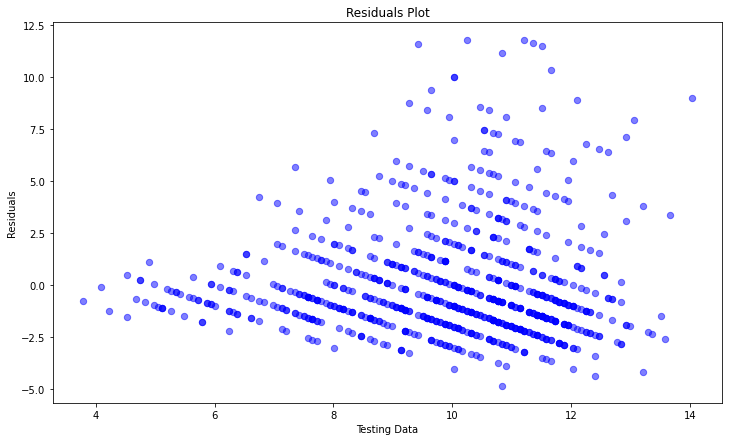

In [51]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [52]:
aba_infant=df[df['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_line
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,6.343413
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,7.847002
16,0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,6.739094
21,0,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10,7.134775
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5,4.918960


In [53]:
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant.Length)

In [54]:
#Creating a Linear Regression model
r_sq = aba_infant[["Length", "Rings"]].corr() 
r_sq

,Length,Rings
Length,1.000000,0.685997
Rings,0.685997,1.000000


In [55]:
import numpy as np
B1 = r_sq.values[0][1] * (np.std(aba_infant.Rings)/np.std(aba_infant["Length"]))
print("For 1 unit of change in Shell weight, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Shell weight, we can predict 15.827255747740896 units of change in Rings


In [56]:
B0 = aba_infant.Rings.mean() - (B1 * aba_infant["Length"].mean())
B0

1.120418216725457

Text(0.5, 0, 'Independent Variable')

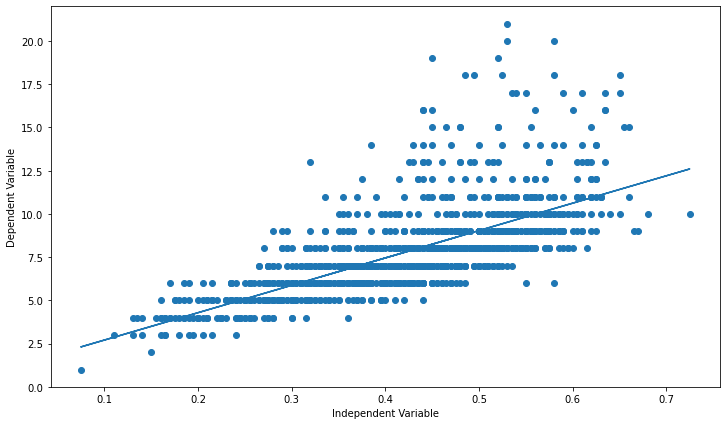

In [57]:
import warnings
warnings.filterwarnings('ignore')

#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
aba_infant["Rings_infant_line"] = B0 + (B1 * aba_infant["Length"])
plt.scatter(aba_infant["Length"],aba_infant.Rings) # create the main scatter plot
plt.plot(aba_infant["Length"], aba_infant.Rings_infant_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [58]:
#Split the variables
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept
lr.intercept_

array([1.32012593])

Text(0, 0.5, 'Predictions')

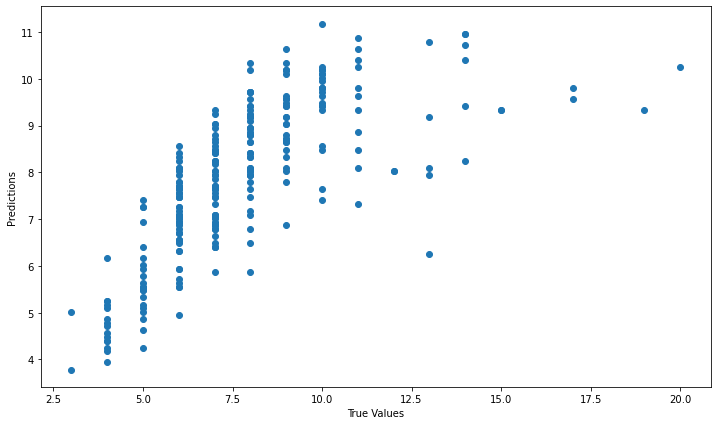

In [60]:
#Making predictions
preds = lr.predict(abax_test)

## plot predicted vs variable
plt.scatter(abay_test, preds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

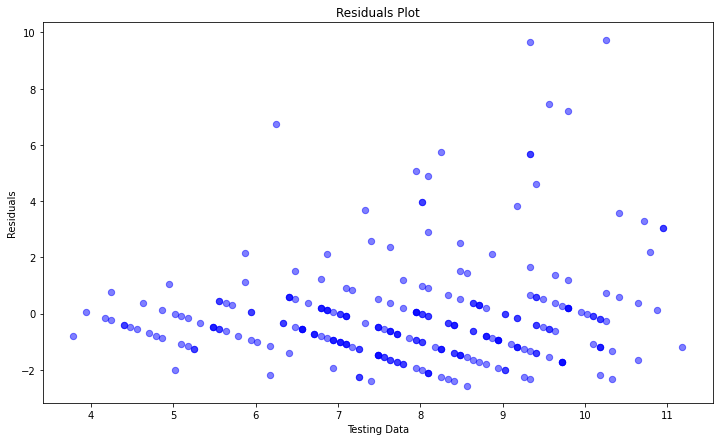

In [61]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [62]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(abay_test, preds)

0.48992951587230327

In [63]:
aba_infant=df[df['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_line
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,6.343413
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,7.847002
16,0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,6.739094
21,0,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10,7.134775
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5,4.918960


In [64]:
import sklearn.preprocessing 
import warnings 
warnings.filterwarnings('ignore')

aba_out=pd.DataFrame(aba_infant[aba_infant.columns[0:7]])
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
df_minmax_array = min_max_scaler.fit_transform(aba_out)
df_minmax = pd.DataFrame(df_minmax_array, columns=aba_out.columns)
df_minmax.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.0,0.392308,0.404040,0.363636,0.099145,0.114563,0.088636
1,0.0,0.538462,0.494949,0.431818,0.170696,0.181230,0.175000
2,0.0,0.430769,0.454545,0.386364,0.140904,0.121683,0.088636
3,0.0,0.469231,0.444444,0.454545,0.109158,0.102265,0.110227
4,0.0,0.253846,0.242424,0.204545,0.033211,0.039482,0.052273


In [65]:
#save the model 
import pickle 
filename='abalone_age.pkl'
pickle.dump(lr,open(filename,'wb')) 